In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing

In [ ]:
file_path = '/content/drive/MyDrive/kb차차차/KB_소형_현대_최종.csv'

In [ ]:
kb = pd.read_csv(file_path)

In [ ]:
kb.head()

,제조사,모델,차종,가격(만원),연식,주행거리(km),연료,변속기,연비(km),배기량(cc),색상
0,현대,엑센트,소형,650,2013,35252,가솔린,오토,14,1591,은색
1,현대,엑센트,소형,670,2013,64509,가솔린,오토,14,1396,흰색
2,현대,엑센트,소형,450,2012,186910,가솔린,오토,0,1591,은색
3,현대,엑센트,소형,790,2015,20015,디젤,오토,18,1582,흰색
4,현대,엑센트,소형,700,2014,73000,가솔린,CVT,14,1368,검정색


In [ ]:
kb1 = kb[kb['배기량(cc)'] != 0]

In [ ]:
kb1 = kb1[kb1['연비(km)'] != 0]
kb1.head()

,제조사,모델,차종,가격(만원),연식,주행거리(km),연료,변속기,연비(km),배기량(cc),색상
0,현대,엑센트,소형,650,2013,35252,가솔린,오토,14,1591,은색
1,현대,엑센트,소형,670,2013,64509,가솔린,오토,14,1396,흰색
3,현대,엑센트,소형,790,2015,20015,디젤,오토,18,1582,흰색
4,현대,엑센트,소형,700,2014,73000,가솔린,CVT,14,1368,검정색
5,현대,엑센트,소형,710,2015,74477,가솔린,오토,14,1396,흰색


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0,

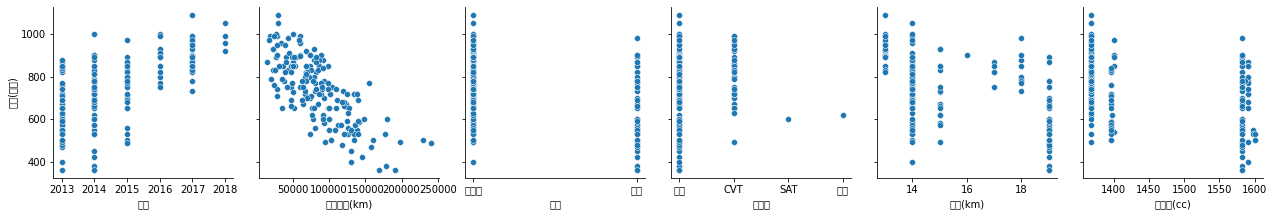

In [ ]:
sns.pairplot(data=kb1, x_vars=['연식', '주행거리(km)', '연료', '변속기', '연비(km)', '배기량(cc)'], y_vars='가격(만원)', size=3)

In [ ]:
X = kb1[['연식', '주행거리(km)', '연비(km)', '배기량(cc)']].values
X[:5]

array([[ 2013, 35252,    14,  1591],
       [ 2013, 64509,    14,  1396],
       [ 2015, 20015,    18,  1582],
       [ 2014, 73000,    14,  1368],
       [ 2015, 74477,    14,  1396]])

In [ ]:
y = kb1['가격(만원)'].values
y[:5]

array([650, 670, 790, 700, 710])

In [ ]:
X.shape, y.shape

((177, 4), (177,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((123, 4), (54, 4), (123,), (54,))

## 선형회귀 (1차항)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
train_pred = lin_reg.predict(X_train)

In [ ]:
train_pred[:5]

array([614.38494101, 993.06392953, 844.41766474, 520.76715143,
       764.5991584 ])

In [ ]:
y_train[:5]

array([ 670, 1050,  740,  599,  560])

In [ ]:
np.sqrt(mean_squared_error(y_train, train_pred))

82.81450248905561

In [ ]:
r2_score(y_train, train_pred)

0.6903477161497018

In [ ]:
test_pred = lin_reg.predict(X_test)

In [ ]:
test_pred[:5]

array([911.93897539, 829.12660479, 631.36499777, 617.56896656,
       890.82184642])

In [ ]:
y_test[:5]

array([850, 799, 530, 720, 930])

In [ ]:
np.sqrt(mean_squared_error(y_test, test_pred))

87.81307148520885

In [ ]:
r2_score(y_test, test_pred) 

0.7094710866527983

## 선형회귀 (2차항)

In [ ]:
poly = PolynomialFeatures(include_bias=False)

In [ ]:
poly.fit_transform(X_train)[:2]

array([[2.01400000e+03, 1.23733000e+05, 1.90000000e+01, 1.58200000e+03,
        4.05619600e+06, 2.49198262e+08, 3.82660000e+04, 3.18614800e+06,
        1.53098553e+10, 2.35092700e+06, 1.95745606e+08, 3.61000000e+02,
        3.00580000e+04, 2.50272400e+06],
       [2.01800000e+03, 2.90000000e+04, 1.40000000e+01, 1.36800000e+03,
        4.07232400e+06, 5.85220000e+07, 2.82520000e+04, 2.76062400e+06,
        8.41000000e+08, 4.06000000e+05, 3.96720000e+07, 1.96000000e+02,
        1.91520000e+04, 1.87142400e+06]])

In [ ]:
scaler = StandardScaler() 

In [ ]:
lin_reg = LinearRegression()

In [ ]:
model = Pipeline(steps=[('poly', poly),
                        ('scaler', scaler),
                        ('lin_reg', lin_reg)])

In [ ]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
model['lin_reg'].coef_

array([-1.99951853e+04,  6.49069842e+03,  6.08330478e+04, -5.65989037e+04,
        1.98346221e+04, -6.62263251e+03, -6.09475794e+04,  5.30935574e+04,
        3.41801986e+01, -1.82595924e+02,  1.95239586e+02,  8.97178559e+01,
        1.07777205e+02,  3.38454780e+03])

In [ ]:
model['poly'].get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x2^2',
 'x2 x3',
 'x3^2']

In [ ]:
train_pred = model.predict(X_train)

In [ ]:
train_pred[:5]

array([ 600.63738423, 1005.98756562,  828.7921758 ,  487.40402633,
        696.15231573])

In [ ]:
y_train[:5]

array([ 670, 1050,  740,  599,  560])

In [ ]:
np.sqrt(mean_squared_error(y_train, train_pred))

77.76192306039766

In [ ]:
r2_score(y_train, train_pred)

0.726979361756336

In [ ]:
test_pred = model.predict(X_test)

In [ ]:
test_pred[:5]

array([981.12702947, 852.8544506 , 631.30388553, 610.38116688,
       893.98206411])

In [ ]:
y_test[:5]

array([850, 799, 530, 720, 930])

In [ ]:
np.sqrt(mean_squared_error(y_test, test_pred))

90.17288907038174

In [ ]:
r2_score(y_test, test_pred)

0.6936463969244139